## Data Science e Machine Learning na Prática - Introdução e Aplicações na Indústria de Processos

Mão na massa 3!

Repita os procedimentos de análise de importância e análise de correlação com os conjuntos de dados Boston Housing e Diabetes usados no começo do notebook.

Mão na massa 4!

Repita o procedimento de análise de contribuições com os conjuntos de dados Boston Housing e Diabetes usados no começo do notebook.

In [1]:
# importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Boston Housing

### Importação de Dados

In [2]:
boston = datasets.load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Análise dos dados

In [3]:
# Transformando os dados em data frame

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target

boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
boston_corr = boston_df.corr().MEDV.drop('MEDV').sort_values(ascending = False)

boston_corr

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Os indicadores que possuem maior correlação com o preço são:

LSTAT - Representa a procentagem de pessoas de baixa renda da população que possui correlação negativa. Indicando que quanto maior a população de baixa renda menor o preço das propriedades;  
RM - Número médio de comodos por habitação que apresenta uma correlação positiva;  
PTRATIO - Proporção de professores por aluno no local que apresenta uma correlação positiva;   
INDUS - proporção de acres de negócios não varejistas por cidade;  
TAX - Taxa de impost por propriedade que apresenta uma correlação negativa;   
NOX - Concentração de óxidos nitricos que apresenta correlação negativa (essa correlação é contra intuítiva. Talvez essa correlação esteja ligada a área com alta de concentração de óxidos nitricos são zonas rurais que apresentam preços mais baixos).


In [5]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Não há dados faltantes.

### Machine Learning

Como modelo será usado arvore de decisão, regressão linear, KNN e florestas aleatorias.  
Será medido a qualidade do modelo com a média quadrada do erro, media absoluta do erro.

(para alguns métodos serem mais precisos é necessário normalizar os dados de entrada com média 0 e devio padrão 1)

In [6]:
n_boston_df = (boston_df.iloc[:, :-1] - boston_df.iloc[:, :-1].mean())/boston_df.iloc[:, :-1].std()

n_boston_df.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487

### Análise de correlação

In [7]:
X_train, X_test, y_train, y_test = train_test_split(n_boston_df,
                                                    boston.target,
                                                    test_size = 0.3,
                                                    random_state = 1)

models = {
    'random_forest': {'model': RandomForestRegressor()},
    'decision_tree': {'model': DecisionTreeRegressor()},
    'linear_regression': {'model': LinearRegression()},
    'k_nearest_neighbor': {'model': KNeighborsRegressor()}
}


for key in models.keys():
    models[key]['model'].fit(X_train, y_train)
    prediction = models[key]['model'].predict(X_test)
    models[key]['MSE'] = mean_squared_error(prediction, y_test)
    models[key]['MSA'] = mean_absolute_error(prediction, y_test)
    models[key]['r2'] = r2_score(y_test, prediction)
    print(models[key])

{'model': RandomForestRegressor(), 'MSE': 8.922977730263158, 'MSA': 2.2487697368421053, 'r2': 0.9026454894635718}
{'model': DecisionTreeRegressor(), 'MSE': 24.367039473684212, 'MSA': 3.2177631578947365, 'r2': 0.7341424272374165}
{'model': LinearRegression(), 'MSE': 19.831323672063156, 'MSA': 3.344665503598749, 'r2': 0.783629538507629}
{'model': KNeighborsRegressor(), 'MSE': 17.088568421052635, 'MSA': 2.8026315789473686, 'r2': 0.8135544809489537}


O modelo que apresentou melhor ajuste aos dados foi o de florestas aleatórias.

### Removendo colunas menos importantes

In [8]:
m_base = models['random_forest']['model']
columns = boston_df.drop('MEDV', axis = 1).columns
values = m_base.feature_importances_

columns_importances = pd.Series(index = columns, data = values).sort_values(ascending = False)
columns_importances

LSTAT      0.608290
RM         0.180092
DIS        0.061830
CRIM       0.038134
NOX        0.025724
AGE        0.024545
PTRATIO    0.018220
TAX        0.013850
B          0.013748
INDUS      0.009310
RAD        0.004051
CHAS       0.001212
ZN         0.000995
dtype: float64

Os indicadores que possuem maior influência com o preço são:

LSTAT - Representa a procentagem de pessoas de baixa renda da população. Não somente possuí correlação negativa como também é uma das colunas mais influêntes no preço;  
RM - Número médio de comodos por habitação apresenta uma correlação positiva e é bastante influênte no preço;   
DIS - Distãncia dos centro de empregos se mostoru bem influênte no preço;  
CRIM - Possuí uma correlação negativa e é bastante influênte no preço.

In [9]:
important_columns = columns_importances[columns_importances > 0.005].index
boston_df_clean = boston_df[list(important_columns) + ['MEDV']]

### Removendo colunas redundantes

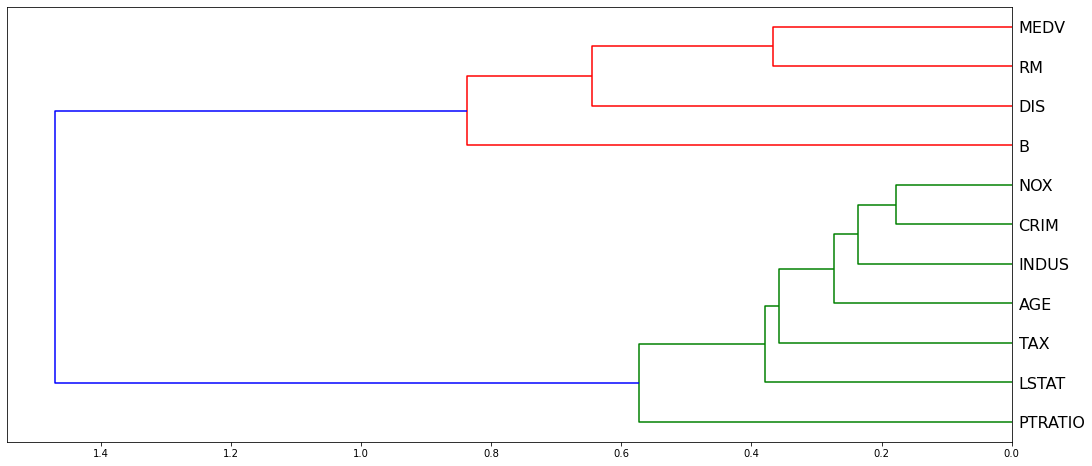

In [10]:
def dendogram_spearmanr(df, tags):

    import scipy.cluster.hierarchy
    import scipy.stats
    
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = scipy.cluster.hierarchy.distance.squareform(1-corr)
    z = scipy.cluster.hierarchy.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(18,8))
    dendrogram = scipy.cluster.hierarchy.dendrogram(z, labels=tags, orientation='left', leaf_font_size=16)
    plt.show()
    
dendogram_spearmanr(boston_df_clean, boston_df_clean.columns)

Não há colunas muito redundantes.

### Selecionando Modelo

In [11]:
X_train, X_test, y_train, y_test = train_test_split(boston_df_clean.drop('MEDV', axis = 1),
                                                    boston_df_clean.MEDV,
                                                    test_size=0.3,
                                                    random_state = 1)

In [12]:
%%time

m_base = RandomForestRegressor(oob_score = True,
                               n_jobs=-1,
                               random_state=0,
                               n_estimators=120,
                               min_samples_leaf=1,
                               max_features=0.90,
                               max_depth=8,)
m_base.fit(X_train, y_train)
r2_score(y_test, m_base.predict(X_test))

CPU times: user 581 ms, sys: 57.9 ms, total: 639 ms
Wall time: 657 ms


0.9068754203143958

Mesmo com a remoção das colunas que eram menos importante o R² não se alterou significativamente.

### Análise de contribuíção

In [13]:
!pip install treeinterpreter
!pip install waterfallcharts

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3411 sha256=5ad14b14f0e03e4106bd1e5d965987b113e3aa295d79c4a500374d276a308daa
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [14]:
from treeinterpreter import treeinterpreter as ti
import waterfall_chart

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
row = X_test.values[np.newaxis,0]

prediction, bias, contributions = ti.predict(m_base, row)

idxs = np.argsort(contributions[0])
[o for o in zip(X_test.columns[idxs], X_test.iloc[0][idxs], contributions[0][idxs])]

[('AGE', 70.3, -0.20595242639011746),
 ('B', 396.9, -0.19311028395300106),
 ('DIS', 3.1827, -0.18826098722075388),
 ('CRIM', 0.04932, -0.14226706852419727),
 ('PTRATIO', 18.4, -0.11754617405864692),
 ('NOX', 0.472, 0.16092322483831029),
 ('INDUS', 2.18, 0.7195398507979298),
 ('TAX', 222.0, 0.7841581329025319),
 ('LSTAT', 7.53, 2.639377308696379),
 ('RM', 6.849, 3.0893968332120467)]

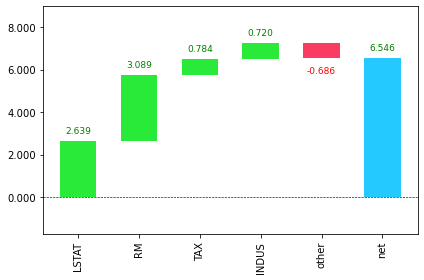

In [16]:
waterfall_chart.plot(X_test.columns, contributions[0], threshold=0.08, 
                     rotation_value=90,formatting='{:,.3f}');

O fatores que tiveram a influência mais positiva no preço dos imóveis foram a alta média de cômodos nas casas e a baixa porcentagem de pessoas de baixa renda.

## Diabets

### Importando Dados

In [17]:
diabets = datasets.load_diabetes()

print(diabets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Análise dos dados

In [18]:
diabets_df = pd.DataFrame(diabets.data, columns = diabets.feature_names)
diabets_df['target'] = diabets.target

diabets_df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [19]:
diabets_df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

Não há dados faltantes.

In [20]:
diabets_corr = diabets_df.corr().target.drop('target').sort_values(ascending = False)

diabets_corr

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64

### Removendo colunas redundantes

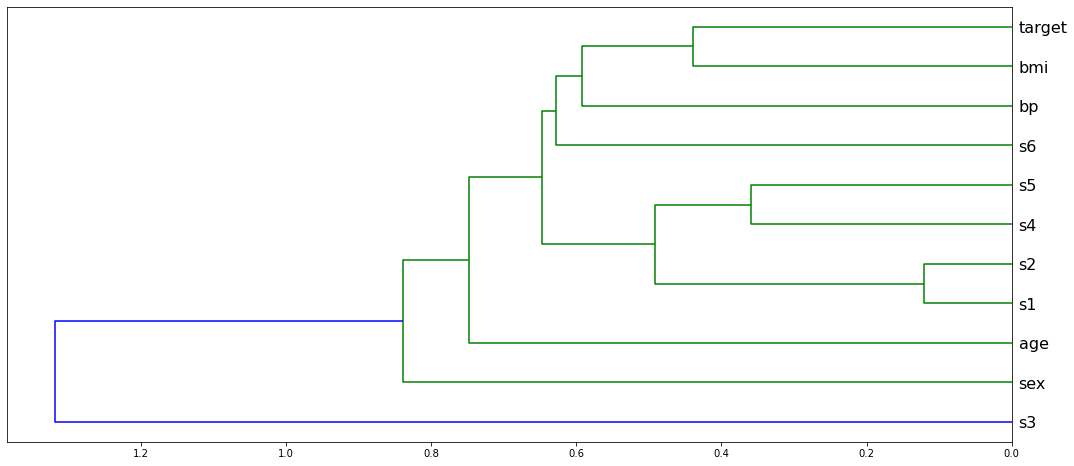

In [21]:
def dendogram_spearmanr(df, tags):

    import scipy.cluster.hierarchy
    import scipy.stats
    
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = scipy.cluster.hierarchy.distance.squareform(1-corr)
    z = scipy.cluster.hierarchy.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(18,8))
    dendrogram = scipy.cluster.hierarchy.dendrogram(z, labels=tags, orientation='left', leaf_font_size=16)
    plt.show()
    
dendogram_spearmanr(diabets_df, diabets_df.columns)

Não há colunas muito redundantes

### Model Selection

In [22]:
def select_model(features, target):
    models = [
        {
            'name': 'Random Forest',
            'estimator': RandomForestRegressor(),
            'hyperparameters': {
                'n_estimators': [1, 5, 10, 20, 50, 100], # 1 estimator é igual a arvore de decisão
                'max_depth': [2, 5, 10],
                "min_samples_leaf": [1, 5, 8],
                "min_samples_split": [2, 3, 5]
            }
        },
        {
            'name': 'Linear Regression',
            'estimator': LinearRegression(),
            'hyperparameters': {
                'normalize': [True, False]
            }
        },
#         {
#             'name': 'K Nearest Neighbor',
#             'estimator': KNeighborsRegressor(),
#             'hyperparameters':{
#                 "n_neighbors": range(1,20,2),
#                 "weights": ["distance", "uniform"],
#                 "algorithm": ["ball_tree", "kd_tree", "brute"],
#                 "p": [1,2]
#             }
#         }
    ]
    
    best_parameters = dict()
    best_estimator = dict()
    best_score = dict()
    
    for model in models:
        grid = GridSearchCV(model['estimator'],
                            param_grid = model['hyperparameters'],
                            cv = 5)
        grid.fit(features, target)
        best_estimator[model['name']] = grid.best_estimator_
        best_parameters[model['name']] = grid.best_params_
        best_score[model['name']] = grid.best_score_
        
    return best_estimator, best_parameters, best_score

In [23]:
best_estimator, best_parameters, best_score = select_model(diabets_df.drop('target', axis = 1), diabets.target)

print(best_score)
print(best_estimator)

{'Random Forest': 0.4591189272221728, 'Linear Regression': 0.48231812211149394}
{'Random Forest': RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=3,
                      n_estimators=20), 'Linear Regression': LinearRegression()}


O modelo que se ajustou mais aos dados foi de regressão linear normalizado. Para classificação das variáveis mais influêntes será utilizado o Random Forest e o Linear Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(diabets_df.drop(['target'], axis = 1),
                                                    diabets_df.target,
                                                    test_size=0.3,
                                                    random_state = 0)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

forest_model = RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=3,
                      n_estimators=50)
forest_model.fit(X_train, y_train)

print('Linear Model R2: ',r2_score(y_test, linear_model.predict(X_test)))
print('Random Forest Model R2: ',r2_score(y_test, forest_model.predict(X_test)))

Linear Model R2:  0.3928939845074759
Random Forest Model R2:  0.3367223486497658


### Importância das Colunas

In [25]:
columns =diabets_df.drop(['target'], axis = 1).columns
values = forest_model.feature_importances_

columns_importances = pd.Series(index = columns, data = values).sort_values(ascending = False)
columns_importances

s5     0.406912
bmi    0.339528
bp     0.075311
s3     0.053750
s6     0.033868
s2     0.026007
age    0.021488
s1     0.020197
s4     0.016570
sex    0.006369
dtype: float64

In [26]:
columns_importances = pd.Series(index = columns, data = linear_model.coef_).abs().sort_values(ascending = False)
columns_importances

s5     721.955802
bmi    579.482776
s1     504.724014
bp     272.464042
s2     241.684419
sex    193.510646
s4      86.620185
s3      69.736188
age     52.469908
s6      26.778870
dtype: float64

Claramente as colunas bmi e s5 são as mais importantes. Mas o modelo não está se ajustando bem aos dados e os modelos estão apresentando uma instabilidade, o simples fato de mudar o random state altera muito o resultado. O uma regressão só com o bmi algumas vezes é mais eficiênte que o modelo.

### Análise de contribuíção

In [27]:
row = X_test.values[np.newaxis,0]

prediction, bias, contributions = ti.predict(m_base, row)

idxs = np.argsort(contributions[0])
[o for o in zip(X_test.columns[idxs], X_test.iloc[0][idxs], contributions[0][idxs])]

[('sex', 0.0506801187398187, -3.766195143243483),
 ('s2', -0.0266789028311707, -0.8119809268010159),
 ('bp', 0.0700725447072635, -0.1147825469682946),
 ('s1', -0.0359677812752396, -0.06347282436178864),
 ('s6', 0.0403433716478807, 0.08694623612902659),
 ('s5', 0.00371173823343597, 0.15870064092602668),
 ('s4', -0.00259226199818282, 0.5736668373016954),
 ('s3', -0.0249926566315915, 0.6477455244205852),
 ('bmi', 0.104808689473925, 8.324686776767676),
 ('age', 0.0199132141783263, 12.156573137693973)]

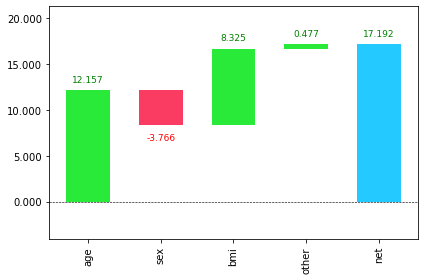

In [28]:
waterfall_chart.plot(X_test.columns, contributions[0], threshold=0.08, 
                     rotation_value=90,formatting='{:,.3f}');

Na análise de contribuição vemos que o parâmetro 'sex'é pouco influênte no modelo teve um fator significativo na predição do modelo, novamente mostrando a instabilidade do modelo que pode ser causada por ter muitos mais dados que influênciam o problema que não estão no data frame.